# Classification -Sınıflandırma 

-Sınıflandırma * Cevabı evet hayır olan sorular için classification modellerini kullanıyoruz Matrixlerimiz Confusion Matrix Accuracy,F1Score,Precision ve Recall

In [3]:
import pandas as pd 
pd.set_option('display.max_columns',100)
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('hr_data.csv')

### EDA - Exploratory Data Analysis 

In [6]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,2,5993.0,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,1,5130.0,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,2,2090.0,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,1,2909.0,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,1,3468.0,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,No


In [7]:
df.sample()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
967,40,Travel_Rarely,329,Research & Development,1,4,Life Sciences,1,1361,2,Male,88,3,1,Laboratory Technician,2,1,2387.0,6762,3,Y,No,22,4,3,80,1,7,3,3,4,2,0,3,No


In [8]:
df.shape

(1470, 35)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.000000,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.000000,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.000000,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.000000,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.000000,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.750000,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.000000,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.750000,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.000000,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.000000,5.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   BusinessTravel            1470 non-null   object 
 2   DailyRate                 1470 non-null   int64  
 3   Department                1470 non-null   object 
 4   DistanceFromHome          1470 non-null   int64  
 5   Education                 1470 non-null   int64  
 6   EducationField            1470 non-null   object 
 7   EmployeeCount             1470 non-null   int64  
 8   EmployeeNumber            1470 non-null   int64  
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1470 non-null   int64  
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   int64  
 14  JobRole 

In [11]:
df.isnull().sum() #boş veri var bunları başlamadan doldurmak lazım 

Age                           0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInC

In [12]:
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [13]:
df['Attrition'].value_counts()

Attrition
No     1020
Yes     185
Name: count, dtype: int64

In [14]:
#185 kişi işten ayrılmış 

In [15]:
import seaborn as sns

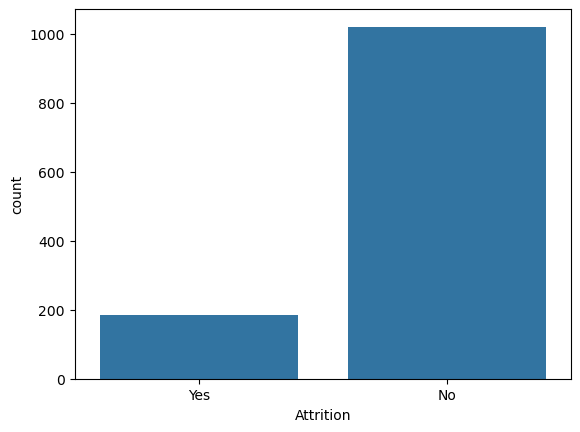

In [16]:
sns.countplot(x=df['Attrition']);

In [17]:
d={'No':0,'Yes':1} #no gördüğünü 0 yap yes gördüğünü 1 yap

In [18]:
df['Attrition']=df['Attrition'].map(d) # map kelimesi for döngüsünün modern hali

In [19]:
bos=df[df['Attrition'].isnull()]
dolu=df[df['Attrition'].notnull()]

In [20]:
bos.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
367,50,Travel_Rarely,1046,Research & Development,10,3,Technical Degree,1,491,4,Male,100,2,3,Healthcare Representative,4,2,9587.987822,2755,6,Y,No,15,3,4,80,0,20,2,3,4,3,1,3,NaN
368,40,Travel_Rarely,575,Sales,22,2,Marketing,1,492,3,Male,68,2,2,Sales Executive,3,1,5910.500884,6110,2,Y,Yes,12,3,1,80,2,8,6,3,6,4,1,0,NaN
369,31,Travel_Rarely,408,Research & Development,9,4,Life Sciences,1,493,3,Male,42,2,1,Research Scientist,2,2,2611.940519,7551,0,Y,Yes,16,3,4,80,0,3,5,3,2,2,2,2,NaN
370,21,Travel_Rarely,156,Sales,12,3,Life Sciences,1,494,3,Female,90,4,1,Sales Representative,2,2,1963.485226,25422,1,Y,No,15,3,4,80,0,1,0,3,1,0,0,0,NaN
371,29,Travel_Rarely,1283,Research & Development,23,3,Life Sciences,1,495,4,Male,54,3,1,Research Scientist,4,2,2761.033309,18168,9,Y,No,16,3,4,80,0,6,4,3,3,2,1,2,NaN


In [21]:
dolu.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,2,5993.0,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1.0
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,1,5130.0,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0.0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,2,2090.0,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1.0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,1,2909.0,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0.0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,1,3468.0,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0.0


In [22]:
x=dolu.drop('Attrition',axis=1) # x den Attrition sütünü çıkarttık y ye aktardık 
y=dolu['Attrition']

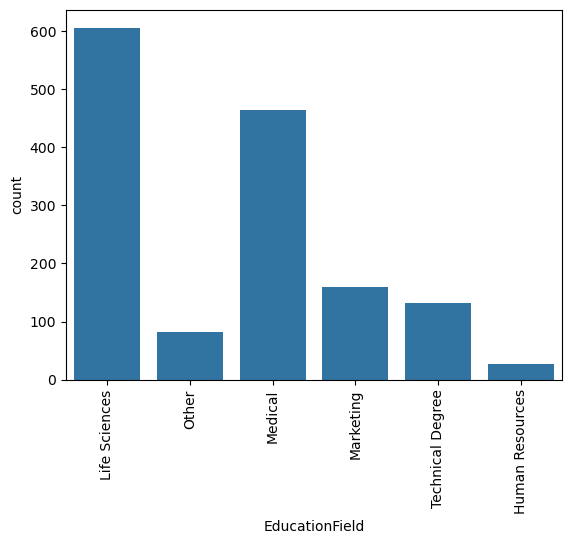

In [23]:
sns.countplot(x=df['EducationField'])
plt.xticks(rotation=90);

In [24]:
x.head().T

,0,1,2,3,4
Age,41,49,37,33,27
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,1,2,4,5,7
EnvironmentSatisfaction,2,3,4,4,1


In [25]:
x=pd.get_dummies(x,drop_first=True) #yazıları rakama çevirdik 

In [26]:
x.head().T

,0,1,2,3,4
Age,41,49,37,33,27
DailyRate,1102,279,1373,1392,591
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EmployeeCount,1,1,1,1,1
EmployeeNumber,1,2,4,5,7
EnvironmentSatisfaction,2,3,4,4,1
HourlyRate,94,61,92,56,40
JobInvolvement,3,2,2,3,3
JobLevel,2,2,1,1,1


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
x.shape

(1205, 46)

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [30]:
g=GaussianNB()
b=BernoulliNB()

In [31]:
g.fit(x_train,y_train)

GaussianNB()

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
gtahmin=g.predict(x_test)

In [34]:
accuracy_score(gtahmin,y_test) #işten ayrılanları tahmin ediyoruz 

0.7883817427385892

In [35]:
confusion_matrix(gtahmin, y_test)


array([[171,  11],
       [ 40,  19]], dtype=int64)

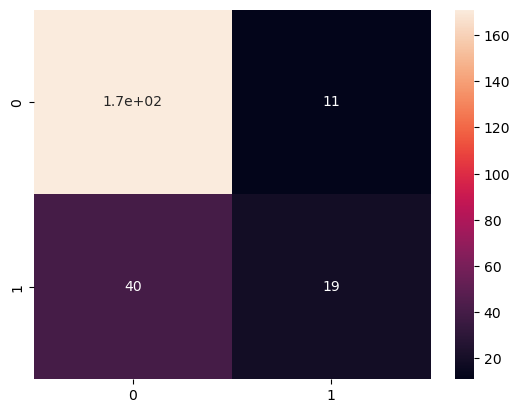

In [36]:
import seaborn as sns
sns.heatmap(confusion_matrix(gtahmin, y_test), annot=True);

In [37]:
print(classification_report(gtahmin, y_test))

              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87       182
         1.0       0.63      0.32      0.43        59

    accuracy                           0.79       241
   macro avg       0.72      0.63      0.65       241
weighted avg       0.77      0.79      0.76       241



In [38]:
b.fit(x_train,y_train)

BernoulliNB()

In [39]:
btahmin=b.predict(x_test)

In [40]:
accuracy_score(btahmin,y_test) #işten ayrılanları tahmin ediyoruz bernoulli algoritmasına göre 

0.8257261410788381

In [41]:
confusion_matrix(btahmin, y_test)

array([[192,  23],
       [ 19,   7]], dtype=int64)

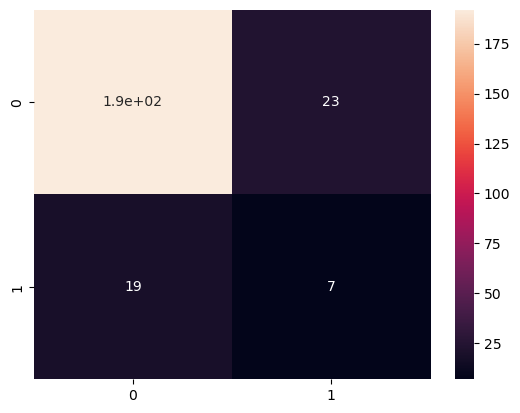

In [42]:
sns.heatmap(confusion_matrix(btahmin, y_test), annot=True);

In [43]:
print(classification_report(btahmin, y_test))

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90       215
         1.0       0.23      0.27      0.25        26

    accuracy                           0.83       241
   macro avg       0.57      0.58      0.58       241
weighted avg       0.84      0.83      0.83       241



In [44]:
# SMOTE # 

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
l=LogisticRegression()

In [47]:
l.fit(x_train,y_train)

LogisticRegression()

In [48]:
ltahmin=l.predict(x_test)

In [49]:
print(classification_report(ltahmin, y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93       239
         1.0       0.00      0.00      0.00         2

    accuracy                           0.87       241
   macro avg       0.50      0.44      0.46       241
weighted avg       0.98      0.87      0.92       241



In [50]:
confusion_matrix(ltahmin, y_test)

array([[209,  30],
       [  2,   0]], dtype=int64)

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
d=DecisionTreeClassifier()

In [53]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
dtahmin=d.predict(x_test)

In [55]:
print(classification_report(dtahmin, y_test))

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       201
         1.0       0.27      0.20      0.23        40

    accuracy                           0.78       241
   macro avg       0.56      0.55      0.55       241
weighted avg       0.75      0.78      0.76       241



In [56]:
confusion_matrix(dtahmin, y_test)

array([[179,  22],
       [ 32,   8]], dtype=int64)

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
r=RandomForestClassifier()

In [59]:
r.fit(x_train,y_train)

RandomForestClassifier()

In [60]:
rtahmin=r.predict(x_test)

In [61]:
confusion_matrix(rtahmin, y_test)

array([[209,  27],
       [  2,   3]], dtype=int64)

In [62]:
print(classification_report(rtahmin,y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94       236
         1.0       0.10      0.60      0.17         5

    accuracy                           0.88       241
   macro avg       0.55      0.74      0.55       241
weighted avg       0.97      0.88      0.92       241



In [63]:
from sklearn.ensemble import GradientBoostingClassifier

In [64]:
h=GradientBoostingClassifier()

In [65]:
h.fit(x_train,y_train)

GradientBoostingClassifier()

In [66]:
htahmin=h.predict(x_test)

In [67]:
confusion_matrix(htahmin,y_test) #sol üst ve ssağ altın yüksek diğerinin de düşük olması lazım 

array([[208,  24],
       [  3,   6]], dtype=int64)

In [68]:
print(classification_report(htahmin,y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94       232
         1.0       0.20      0.67      0.31         9

    accuracy                           0.89       241
   macro avg       0.59      0.78      0.62       241
weighted avg       0.96      0.89      0.92       241



In [69]:
from sklearn.neighbors import KNeighborsClassifier

k = KNeighborsClassifier()

k.fit(x_train, y_train)

import numpy as np

ktahmin = k.predict(np.array(x_test))

confusion_matrix(ktahmin, y_test)


  File "C:\Users\PC\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\PC\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\PC\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\PC\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


array([[205,  29],
       [  6,   1]], dtype=int64)